In [1]:
import dca_frustratometer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
palette={'Minimally Frustrated':"green",'Frustrated':"red",'Neutral':"gray"}

# Measure Frustration of Complete PDB

In [3]:
structure=dca_frustratometer.Structure.full_pdb('./data/3VI6_A.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=10)

@> 1548 atoms and 1 coordinate set(s) were parsed in 0.03s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1552
  PDBConstructionWarning,
@> 1548 atoms and 1 coordinate set(s) were parsed in 0.01s.


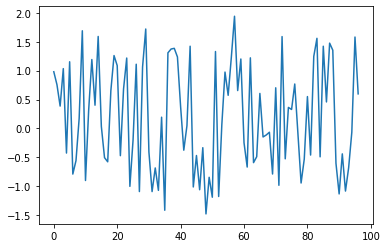

In [4]:
plt.plot(AWSEM_model.frustration(kind='singleresidue'))

In [5]:
print(AWSEM_model.native_energy())

-603.5353674842179


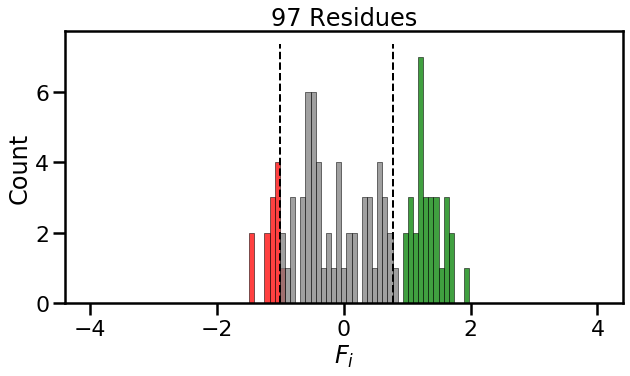

30.93% of Residues are Minimally Frustrated
12.37% of Residues are Frustrated
56.70% of Residues are Neutral


In [6]:
AWSEM_model.view_frustration_histogram(kind="singleresidue")

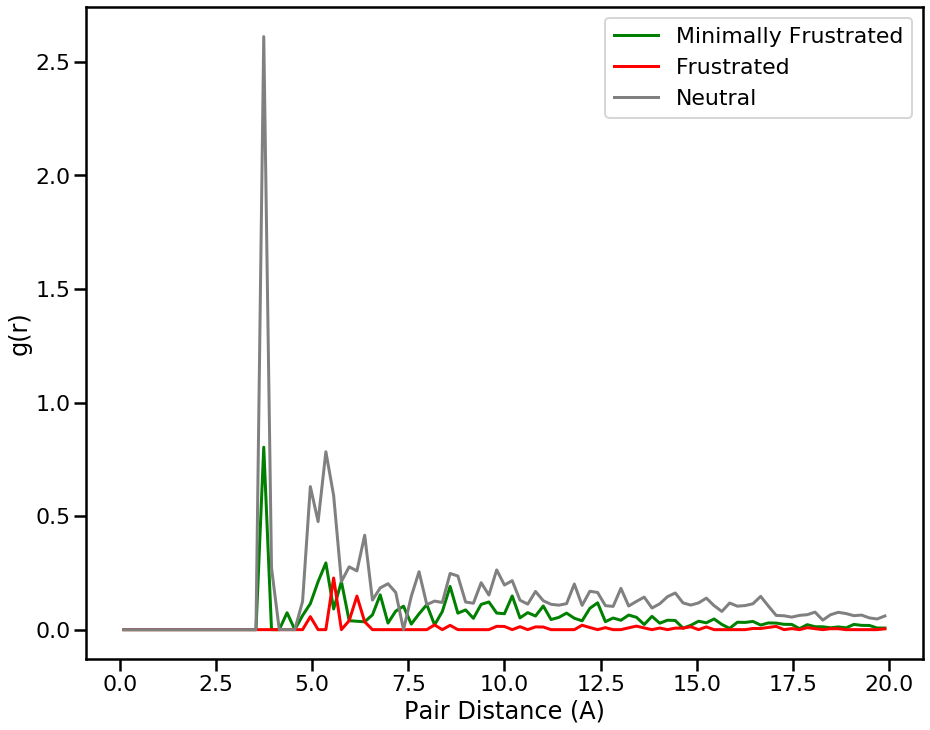

In [7]:
AWSEM_model.view_frustration_pair_distribution(kind="singleresidue")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


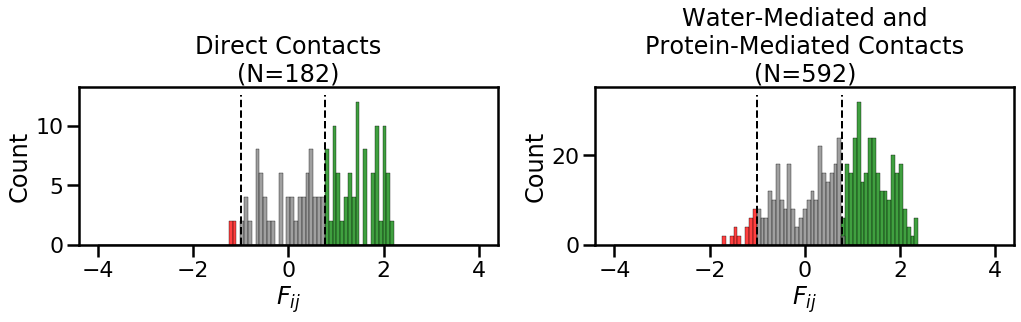

53.85% of Direct Contacts are Minimally Frustrated
2.20% of Direct Contacts are Frustrated
43.96% of Direct Contacts are Neutral
###
50.34% of Water-Mediated Contacts are Minimally Frustrated
4.73% of Water-Mediated Contacts are Frustrated
44.93% of Water-Mediated Contacts are Neutral


In [8]:
AWSEM_model.view_frustration_histogram(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


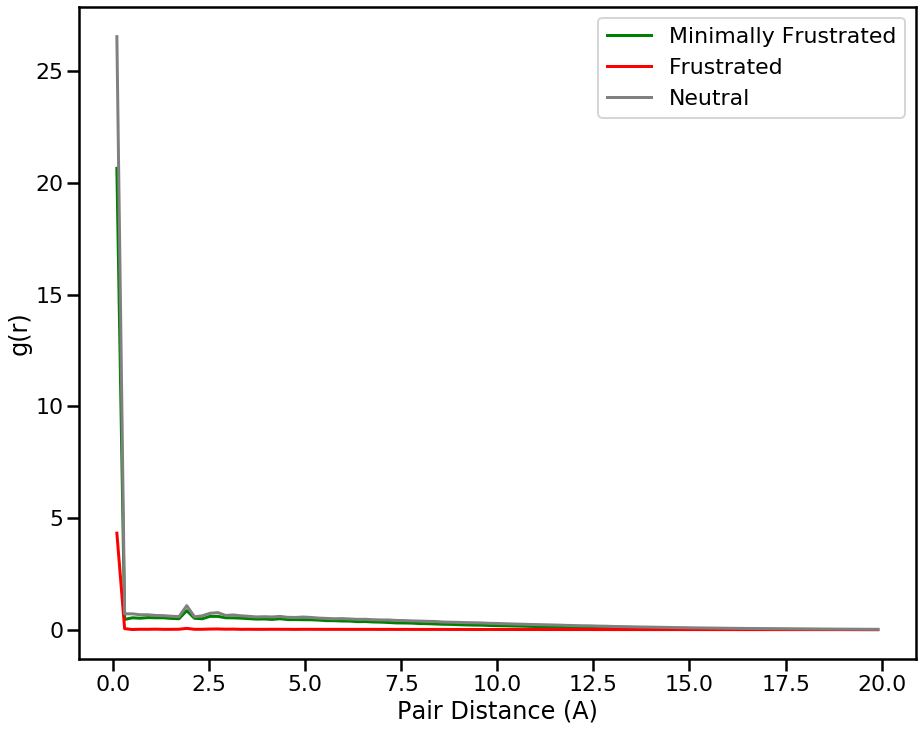

In [9]:
AWSEM_model.view_frustration_pair_distribution(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


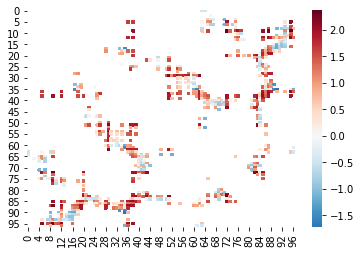

In [10]:
sns.heatmap(AWSEM_model.frustration(kind='mutational'),cmap='RdBu_r',center=0)

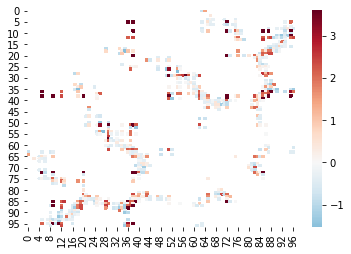

In [11]:
sns.heatmap(AWSEM_model.frustration(kind='contact'),cmap='RdBu_r',center=0)

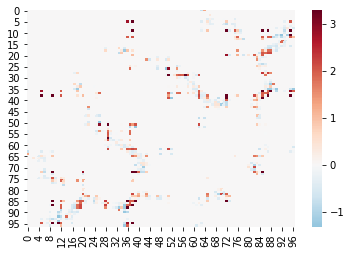

In [12]:
sns.heatmap(AWSEM_model.frustration(kind='contact',correction=0.1),cmap='RdBu_r',center=0)

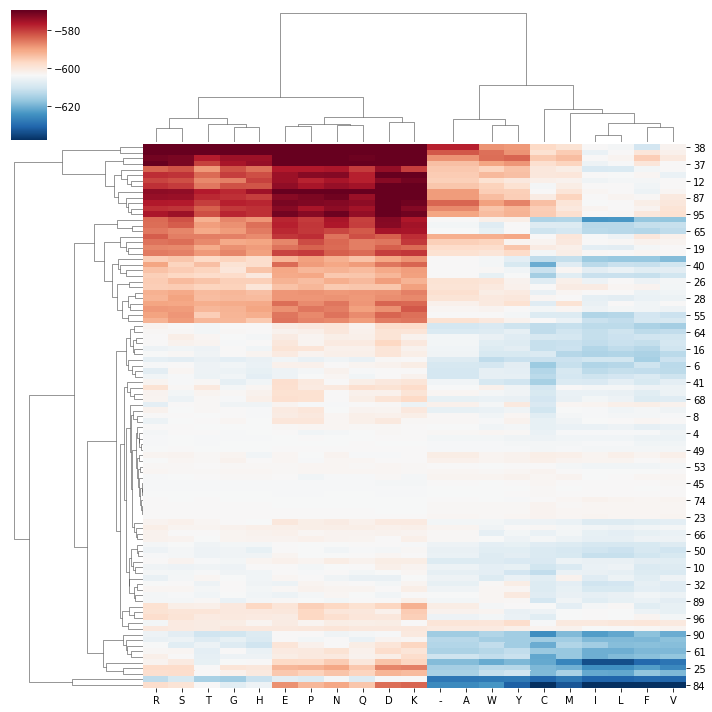

In [13]:
AWSEM_model.plot_decoy_energy(kind='singleresidue')

In [14]:
#sns.clustermap(model.decoy_energy('mutational').reshape(-1,21*21))

In [15]:
AWSEM_model.decoy_fluctuation(kind='singleresidue').mean()

3.0475847523124164

In [16]:
AWSEM_model.decoy_fluctuation(kind='mutational').mean()

0.9706614953800358

In [17]:
AWSEM_model.decoy_fluctuation(kind='contact').mean()

0.044253753008460045

In [18]:
AWSEM_model.view_frustration()


/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

# Compare Lammps AWSEM and DCA Frustratometer Frustration Values

## Cyclophilin A (PDB: 6U5E)

In [19]:
structure=dca_frustratometer.Structure.full_pdb('./data/6U5E_A.pdb',"A")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=10)

@> 2471 atoms and 1 coordinate set(s) were parsed in 0.04s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2475
  PDBConstructionWarning,
@> 2471 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [20]:
def identify_frustration_type(x,column_name):
    if x[column_name]>.78:
        x["Type"]="Minimally Frustrated"
    elif x[column_name]<-1:
        x["Type"]="Frustrated"
    else:
        x["Type"]="Neutral"
    return x

### Compare Single Residue Frustration Values Distributions

In [21]:
#Import Lammps AWSEM single residue frustration values
lammps_single_frustration_dataframe=pd.read_csv("./data/6U5E_A_tertiary_frustration_single_residue.dat",header=0,sep="\s+")
lammps_single_frustration_dataframe=lammps_single_frustration_dataframe.apply(lambda x: identify_frustration_type(x,column_name="f_i"),axis=1)

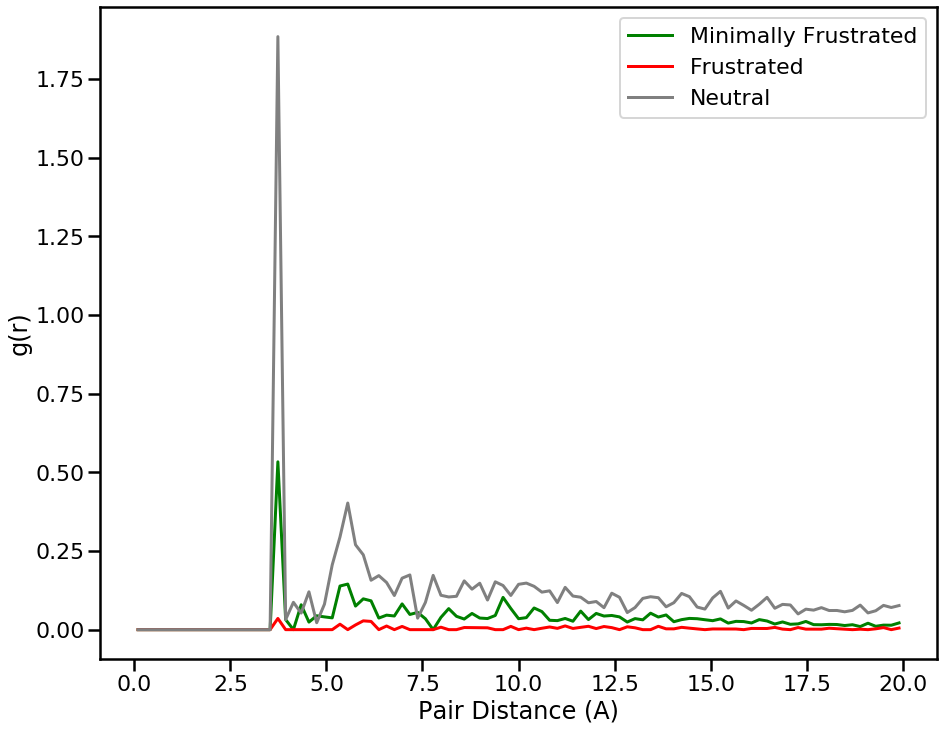

In [22]:
AWSEM_model.view_frustration_pair_distribution(kind="singleresidue")

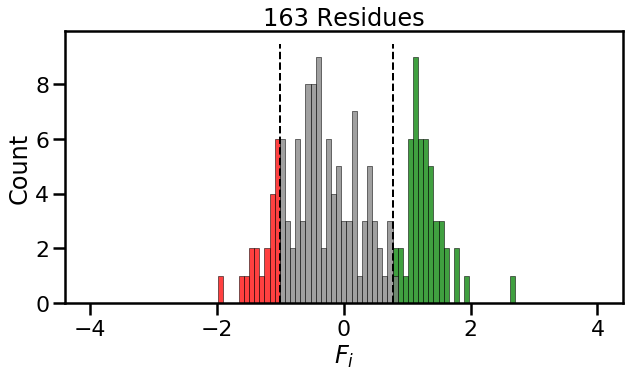

30.06% of Residues are Minimally Frustrated
12.27% of Residues are Frustrated
57.67% of Residues are Neutral


In [23]:
#DCA_Frustratometer single residue frustration histogram
AWSEM_model.view_frustration_histogram(kind="singleresidue")

30.67% of Contacts are Minimally Frustrated
11.66% of Contacts are Frustrated
57.67% of Contacts are Neutral


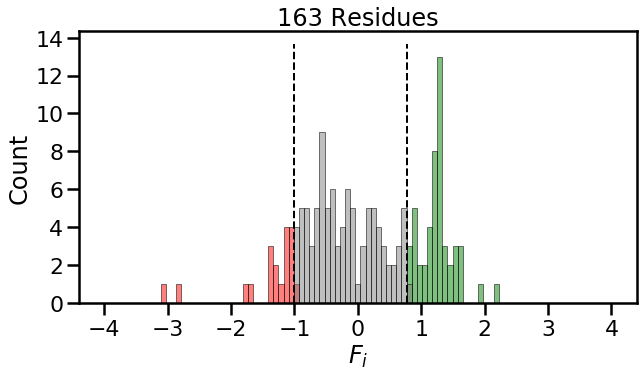

In [24]:
#Lammps AWSEM Frustratometer single residue frustration histogram
r=np.linspace(-4,4,num=100)

with sns.plotting_context("poster"):
    plt.figure(figsize=(10,5))

    g=sns.histplot(data=lammps_single_frustration_dataframe,x="f_i",hue='Type',palette=palette,bins=r,legend=False)
    
    ymin, ymax = g.get_ylim()
    g.vlines(x=[-1, .78], ymin=ymin, ymax=ymax, colors=['black', 'black'], ls='--', lw=2)
    plt.title(f"{len(lammps_single_frustration_dataframe)} Residues")
    plt.xlabel("$F_{i}$")
    
print(f"{(len(lammps_single_frustration_dataframe.loc[((lammps_single_frustration_dataframe['Type']=='Minimally Frustrated'))])/len(lammps_single_frustration_dataframe))*100:.2f}% of Contacts are Minimally Frustrated")
print(f"{(len(lammps_single_frustration_dataframe.loc[((lammps_single_frustration_dataframe['Type']=='Frustrated'))])/len(lammps_single_frustration_dataframe))*100:.2f}% of Contacts are Frustrated")
print(f"{(len(lammps_single_frustration_dataframe.loc[((lammps_single_frustration_dataframe['Type']=='Neutral'))])/len(lammps_single_frustration_dataframe))*100:.2f}% of Contacts are Neutral")

### Compare Mutational Frustration Values Distributions

In [25]:
frustratometer_mutational_frustration=AWSEM_model.frustration(kind="mutational")
###
#Import Lammps AWSEM mutational frustration values
lammps_mutational_frustration_dataframe=pd.read_csv("./data/6U5E_A_tertiary_frustration_mutational.dat",header=0,sep="\s+")
lammps_mutational_frustration_dataframe["Contact_Type"]=np.where(lammps_mutational_frustration_dataframe["r_ij"]<6.5,"Direct","Water-Mediated")
lammps_mutational_frustration_dataframe=lammps_mutational_frustration_dataframe.apply(lambda x: identify_frustration_type(x,column_name="f_ij"),axis=1)
###
lammps_mutational_frustration=np.full((163, 163), np.nan)
for index,row in lammps_mutational_frustration_dataframe.iterrows():
    lammps_mutational_frustration[row.i-1,row.j-1]=row.f_ij
    lammps_mutational_frustration[row.j-1,row.i-1]=row.f_ij

merged_mutational_frustration=np.triu(lammps_mutational_frustration)+np.tril(frustratometer_mutational_frustration)

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


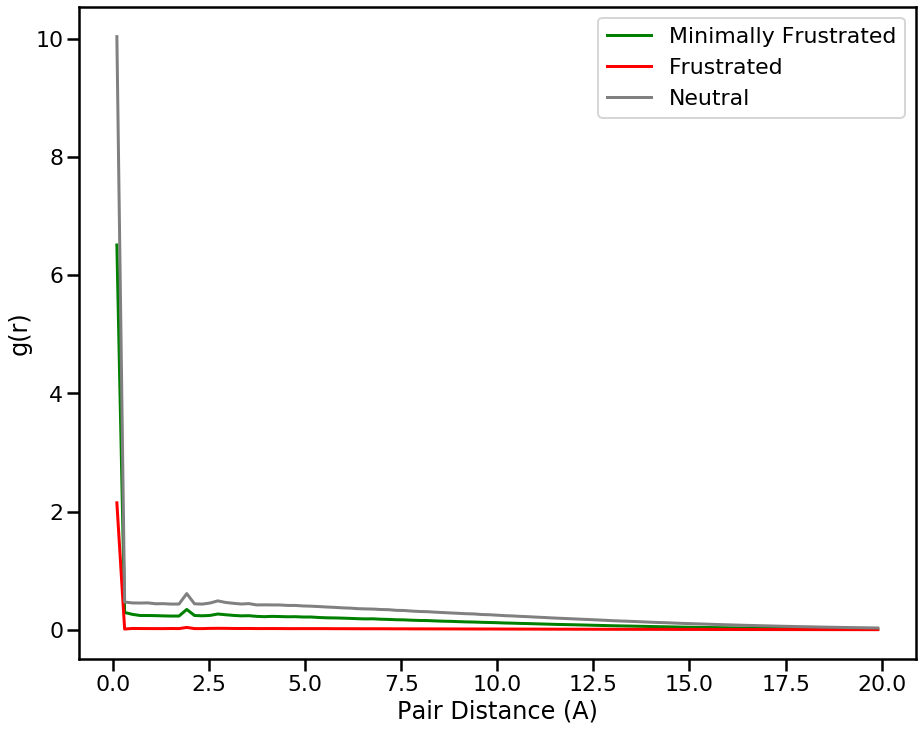

In [26]:
AWSEM_model.view_frustration_pair_distribution(kind="mutational")

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)


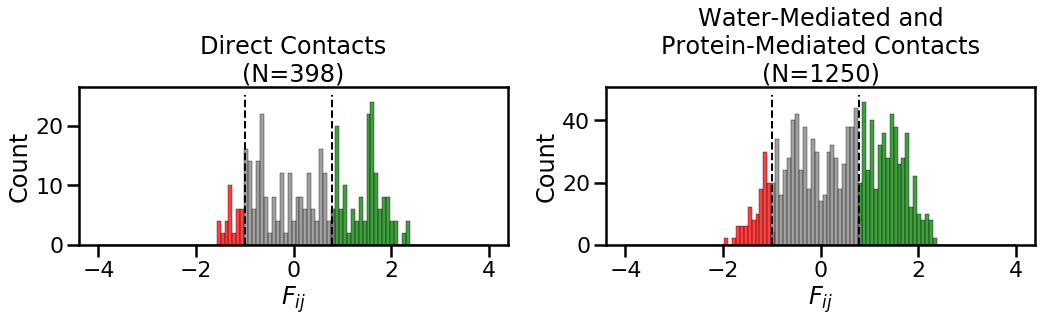

40.20% of Direct Contacts are Minimally Frustrated
8.54% of Direct Contacts are Frustrated
51.26% of Direct Contacts are Neutral
###
38.88% of Water-Mediated Contacts are Minimally Frustrated
9.92% of Water-Mediated Contacts are Frustrated
51.20% of Water-Mediated Contacts are Neutral


In [27]:
#DCA_Frustratometer mutational frustration histogram
AWSEM_model.view_frustration_histogram(kind="mutational")

36.61% of Direct Contacts are Minimally Frustrated
10.12% of Direct Contacts are Frustrated
53.27% of Direct Contacts are Neutral
###
36.71% of Water-Mediated Contacts are Minimally Frustrated
11.05% of Water-Mediated Contacts are Frustrated
52.24% of Water-Mediated Contacts are Neutral


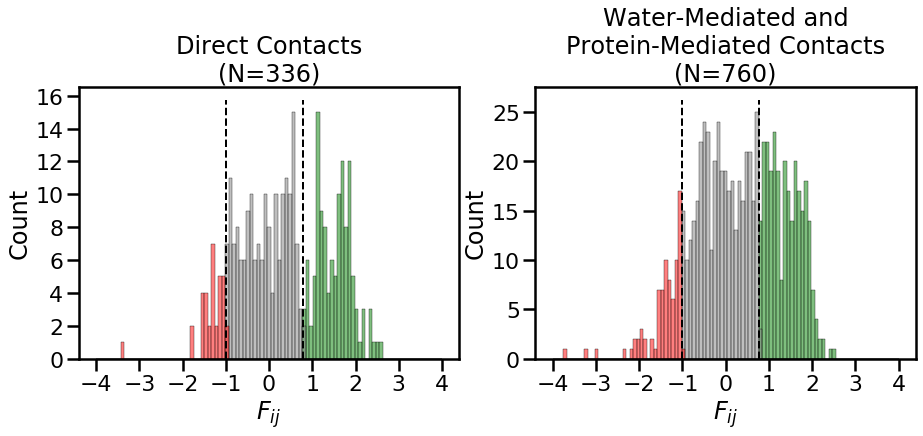

In [28]:
#Lammps AWSEM Frustratometer mutational frustration histogram
r=np.linspace(-4,4,num=100)

with sns.plotting_context("poster"):
    fig,axes=plt.subplots(1,2,figsize=(15,5),sharex=True)

    g=sns.histplot(data=lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']=='Direct'],
                 x="f_ij",hue='Type',palette=palette,bins=r,ax=axes[0],legend=False)
    
    ymin, ymax = g.get_ylim()
    g.vlines(x=[-1, .78], ymin=ymin, ymax=ymax, colors=['black', 'black'], ls='--', lw=2)
    axes[0].title.set_text(f"Direct Contacts\n(N={len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']=='Direct'])})")
    axes[0].set_xlabel("$F_{ij}$")
    ###
    g=sns.histplot(data=lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']!='Direct'],
                 x="f_ij",hue='Type',palette=palette,bins=r,ax=axes[1],legend=False)
    ymin, ymax = g.get_ylim()
    g.vlines(x=[-1, .78], ymin=ymin, ymax=ymax, colors=['black', 'black'], ls='--', lw=2)
    axes[1].title.set_text(f"Water-Mediated and\nProtein-Mediated Contacts\n(N={len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']!='Direct'])})")
    axes[1].set_xlabel("$F_{ij}$")
    
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']=='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Minimally Frustrated'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']=='Direct']))*100:.2f}% of Direct Contacts are Minimally Frustrated")
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']=='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Frustrated'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']=='Direct']))*100:.2f}% of Direct Contacts are Frustrated")
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']=='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Neutral'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']=='Direct']))*100:.2f}% of Direct Contacts are Neutral")
print("###")
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']!='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Minimally Frustrated'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']!='Direct']))*100:.2f}% of Water-Mediated Contacts are Minimally Frustrated")
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']!='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Frustrated'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']!='Direct']))*100:.2f}% of Water-Mediated Contacts are Frustrated")
print(f"{(len(lammps_mutational_frustration_dataframe.loc[((lammps_mutational_frustration_dataframe['Contact_Type']!='Direct') & (lammps_mutational_frustration_dataframe['Type']=='Neutral'))])/len(lammps_mutational_frustration_dataframe.loc[lammps_mutational_frustration_dataframe['Contact_Type']!='Direct']))*100:.2f}% of Water-Mediated Contacts are Neutral")

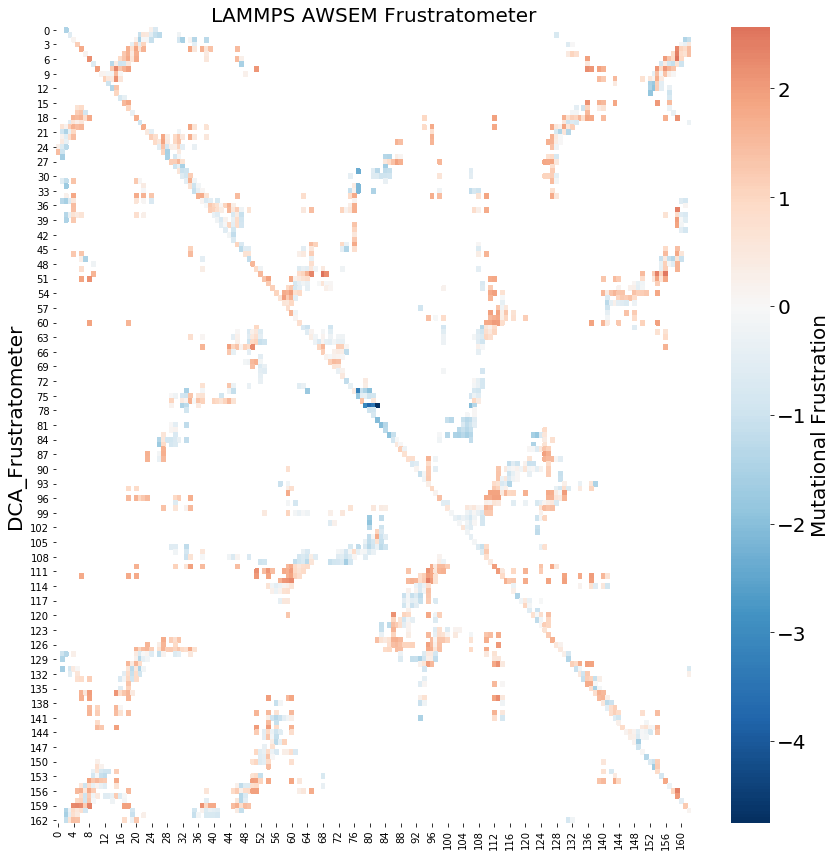

In [29]:
plt.figure(figsize=(12,12))

g=sns.heatmap(merged_mutational_frustration,cmap="RdBu_r",center=0,cbar_kws={'label': 'Mutational Frustration'})
g.set_title("LAMMPS AWSEM Frustratometer",fontsize=20)
g.set_ylabel("DCA_Frustratometer",fontsize=20)
cbar = g.collections[0].colorbar
# here set the labelsize by 20
cbar.ax.tick_params(labelsize=20)
g.figure.axes[-1].yaxis.label.set_size(20)

plt.tight_layout()
plt.savefig("./data/6U5E_A_Lammps_AWSEM_vs_Frustratometer_Frustration_Comparison.png")

# Measure Frustration of PDB Segment

## Ribonuclease A (PDB: 1RNB)

In [30]:
#Use original pdb residue numbering when providing initial and final indices.
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rnb.pdb',"A",seq_selection="resnum `2to23`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1721
  PDBConstructionWarning,
@> 1717 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [31]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Cytochrome C (PDB: 1CYC)

In [32]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1cyc.pdb',"A",seq_selection="resindex `0to50`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 1619
  PDBConstructionWarning,
@> 1615 atoms and 1 coordinate set(s) were parsed in 0.01s.


In [33]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## TIM (PDB: 1TIM)

In [34]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1tim.pdb',"A",seq_selection="resindex `30to80`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3758 atoms and 1 coordinate set(s) were parsed in 0.04s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 3762
  PDBConstructionWarning,
@> 3758 atoms and 1 coordinate set(s) were parsed in 0.03s.


In [35]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## Trypsin (PDB: 3PTN)

In [36]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/3ptn.pdb',"A",seq_selection="resindex `40to65`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 3220 atoms and 1 coordinate set(s) were parsed in 0.02s.
@> 3220 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [37]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

## FGF (PDB: 1RG8)

In [38]:
structure=dca_frustratometer.Structure.spliced_pdb('./data/1rg8.pdb',"A",seq_selection="resindex `10to55`")
AWSEM_model=dca_frustratometer.AWSEMFrustratometer(structure,distance_cutoff_contact=8)

@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.
/Users/fajer/anaconda3/lib/python3.6/site-packages/Bio/PDB/PDBParser.py:399: PDBConstructionWarning: Ignoring unrecognized record 'END' at line 2250
  PDBConstructionWarning,
@> 2246 atoms and 1 coordinate set(s) were parsed in 0.02s.


In [39]:
AWSEM_model.view_frustration()

/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/frustration/frustratometer.py:321: RuntimeWarning: invalid value encountered in true_divide
  contact_frustration = -mean_energy / (std_energy + correction)
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:143: RuntimeWarning: invalid value encountered in greater
  minimally_frustrated = sel_frustration[sel_frustration[:, -1] > 1]
/Volumes/Seagate_Extra_Files/Time-Devolution-Calc/DCA_Energy_Calculations/Github_DCA_Frustratometer/DCA_Frustratometer/dca_frustratometer/classes/Frustratometer.py:144: RuntimeWarning: invalid value encountered in less
  frustrated = sel_frustration[sel_frustration[:, -1] < -.78]


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol